# Average House Sale Prices forecast in New Haven

This can be used as pipeline to forecast the median and average sale prices.
- Libraries used: pandas for dataframe
- Prophet from Facebook is used as a model to forecast the data.

In [24]:
#importing libraries

In [25]:
import pandas as pd
from prophet import Prophet

In [26]:
#ignoring the warnings occured during fitting the model

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Reading the data frame

In [29]:
data_frame=pd.read_csv('New Haven.csv')

In [30]:
county_name=data_frame['County'].value_counts().index[0]

In [31]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price,County
0,2001-01-01,182512.15,235175.24,New Haven
1,2001-02-01,182512.15,207160.58,New Haven
2,2001-03-01,185554.02,221848.14,New Haven
3,2001-04-01,184793.56,217779.41,New Haven
4,2001-05-01,197721.50,239188.69,New Haven


- Since the 'Date' feature is of object dtype. So, we need to convert that to date format
- Dropping the 'County' feature as it is no longer required

In [32]:
data_frame['Date']=pd.to_datetime(data_frame['Date'],format='%Y/%m/%d')
data_frame.drop(['County'],axis=1,inplace=True)

In [33]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price
0,2001-01-01,182512.15,235175.24
1,2001-02-01,182512.15,207160.58
2,2001-03-01,185554.02,221848.14
3,2001-04-01,184793.56,217779.41
4,2001-05-01,197721.50,239188.69


Extracting only Median Sale Price as a dataframe by removing Median Sale Price feature

In [34]:
average_data=data_frame.drop(['Median Sale Price'],axis=1)

## Forecasting average_data

In [35]:
average_data.head()

,Date,Average Sale Price
0,2001-01-01,235175.24
1,2001-02-01,207160.58
2,2001-03-01,221848.14
3,2001-04-01,217779.41
4,2001-05-01,239188.69


### Changing the column names as 'ds' for 'Date' and 'y' for 'Median Sale Price'

In [36]:
average_data.columns=['ds','y']

In [37]:
average_data

,ds,y
0,2001-01-01,235175.24
1,2001-02-01,207160.58
2,2001-03-01,221848.14
3,2001-04-01,217779.41
4,2001-05-01,239188.69
...,...,...
245,2021-06-01,314417.99
246,2021-07-01,309985.40
247,2021-08-01,302522.26
248,2021-09-01,302625.49


In [38]:
#Initializing the Prophet model as m
m = Prophet()
#Fitting the model
m.fit(average_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
#creating the data frame with the next 24 months in 'ds'(Date)
future = m.make_future_dataframe(periods=24,freq='M')
future

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01
...,...
269,2023-05-31
270,2023-06-30
271,2023-07-31
272,2023-08-31


## Predicting the values for the new future dates.

In [40]:
forecast = m.predict(future)
#calling the dataframe with 'ds','yhat,'yhat_lower','yhat_upper' features
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2023-05-31,332866.182315,312468.292340,353782.889885
270,2023-06-30,321681.623735,299557.247142,341858.901980
271,2023-07-31,318782.727058,297104.256419,338997.940365
272,2023-08-31,312030.598146,289963.867690,333698.285244
273,2023-09-30,299533.180299,278300.366099,319962.802635


Calling the forecast dataframe which contains the predicted values along with the actual values

In [41]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,230064.639543,194349.996644,231281.738847,230064.639543,230064.639543,-17522.146718,-17522.146718,-17522.146718,-17522.146718,-17522.146718,-17522.146718,0.0,0.0,0.0,212542.492825
1,2001-02-01,232063.647593,182708.279976,220442.668558,232063.647593,232063.647593,-30013.223033,-30013.223033,-30013.223033,-30013.223033,-30013.223033,-30013.223033,0.0,0.0,0.0,202050.424559
2,2001-03-01,233869.203250,194623.538072,232511.800317,233869.203250,233869.203250,-19933.828982,-19933.828982,-19933.828982,-19933.828982,-19933.828982,-19933.828982,0.0,0.0,0.0,213935.374268
3,2001-04-01,235868.211299,207600.294324,245146.093741,235868.211299,235868.211299,-9948.764498,-9948.764498,-9948.764498,-9948.764498,-9948.764498,-9948.764498,0.0,0.0,0.0,225919.446801
4,2001-05-01,237802.735218,217949.035379,257140.138297,237802.735218,237802.735218,-633.642104,-633.642104,-633.642104,-633.642104,-633.642104,-633.642104,0.0,0.0,0.0,237169.093114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2023-05-31,299645.021652,312468.292340,353782.889885,293822.392290,305366.452096,33221.160663,33221.160663,33221.160663,33221.160663,33221.160663,33221.160663,0.0,0.0,0.0,332866.182315
270,2023-06-30,300405.218862,299557.247142,341858.901980,294169.500454,306573.125835,21276.404873,21276.404873,21276.404873,21276.404873,21276.404873,21276.404873,0.0,0.0,0.0,321681.623735
271,2023-07-31,301190.755978,297104.256419,338997.940365,294449.567717,307847.966618,17591.971080,17591.971080,17591.971080,17591.971080,17591.971080,17591.971080,0.0,0.0,0.0,318782.727058
272,2023-08-31,301976.293095,289963.867690,333698.285244,294535.280771,309155.725251,10054.305051,10054.305051,10054.305051,10054.305051,10054.305051,10054.305051,0.0,0.0,0.0,312030.598146


## Plotting the forecast data

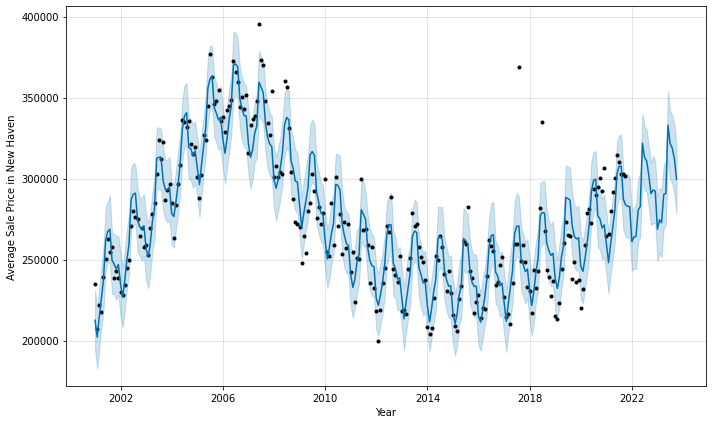

In [42]:
fig1 = m.plot(forecast,xlabel='Year',ylabel='Average Sale Price in '+county_name)

## Plotting components of forecast data

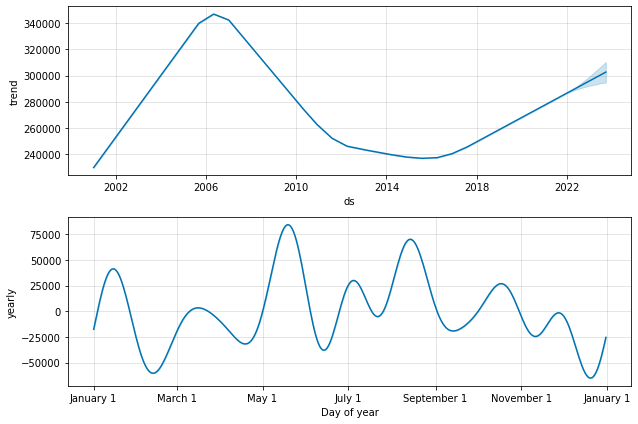

In [43]:
fig2 = m.plot_components(forecast)

## Plotting the final figure using prophet model and forecast data

In [44]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast,xlabel='Year',ylabel='Average Sale Price in '+county_name)

The black dots represents the actual values and the blue line which has a point straight to the black dot is the predicted value.

## Plotting the trend and yearly data

In [45]:
plot_components_plotly(m, forecast)

## Performing cross_validation to check the accuracy

In [46]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 37 forecasts with cutoffs between 2003-01-04 00:00:00 and 2020-10-01 00:00:00


  0%|          | 0/37 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


## Exploring the metrics using performance_metrics from prophet.diagnostics(module used to supervise the model)

In [47]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,4.212090e+08,20523.376553,16788.275177,0.060668,0.061793,0.061571,0.454545
1,40 days,4.171268e+08,20423.682011,16612.116598,0.059687,0.058167,0.060690,0.454545
2,42 days,4.085695e+08,20213.102425,16220.865687,0.058414,0.055905,0.059369,0.477273
3,44 days,3.965644e+08,19913.924192,15673.366540,0.056260,0.052545,0.057183,0.477273
4,45 days,3.877209e+08,19690.629933,15331.448075,0.055190,0.048921,0.056010,0.500000


In [48]:
for err,horizon in zip(df_p['mape'],df_p['horizon']):
    #finding the accuracy by taking off the err(mape) value from 100(percentage)
    accuracy=100-err
    print('Horizon: {}, Accuracy: {}%'.format(horizon,accuracy))

Horizon: 39 days 00:00:00, Accuracy: 99.93933242528291%
Horizon: 40 days 00:00:00, Accuracy: 99.94031346470386%
Horizon: 42 days 00:00:00, Accuracy: 99.94158569407189%
Horizon: 44 days 00:00:00, Accuracy: 99.94373953095334%
Horizon: 45 days 00:00:00, Accuracy: 99.94480986888654%
Horizon: 46 days 00:00:00, Accuracy: 99.94660952592245%
Horizon: 47 days 00:00:00, Accuracy: 99.94767564933514%
Horizon: 49 days 00:00:00, Accuracy: 99.94759198248971%
Horizon: 50 days 00:00:00, Accuracy: 99.94918481945987%
Horizon: 51 days 00:00:00, Accuracy: 99.94913551401912%
Horizon: 52 days 00:00:00, Accuracy: 99.94980313457395%
Horizon: 54 days 00:00:00, Accuracy: 99.9494587411679%
Horizon: 55 days 00:00:00, Accuracy: 99.95049791761707%
Horizon: 56 days 00:00:00, Accuracy: 99.95367815895439%
Horizon: 58 days 00:00:00, Accuracy: 99.95516252397256%
Horizon: 60 days 00:00:00, Accuracy: 99.9552672357115%
Horizon: 61 days 00:00:00, Accuracy: 99.95407927209924%
Horizon: 62 days 00:00:00, Accuracy: 99.9552804377

All the values with horizon(days) got predicted well with a min of 99% accuracy

## Plotting the mape and Horizon(days) to see the metrics from cross_validation 

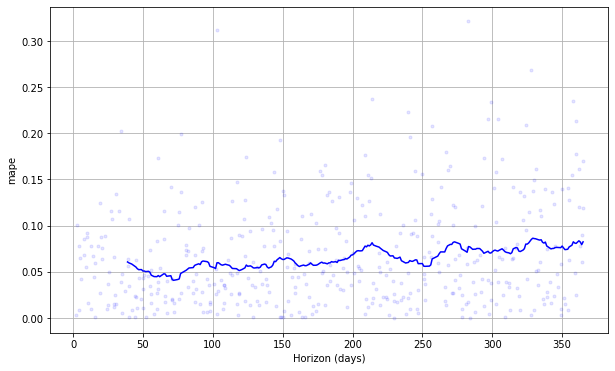

In [49]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

We can see that mape is too low when the Horizon(days) is between 80-90.

### Saving the Prophet model by dumping the model as pickle file for future usage

In [50]:
import pickle

In [51]:
with open(county_name+'_prophet_model_for_average_sale_price.pkl','wb') as file:
    pickle.dump(m,file)